# CD of Vinyl?

Gisteren deed mijn collega de boude uitspraak dat er steeds meer en meer op vinyl uitgebracht werd. Ik vroeg me af hoe sterk die gevoelde stijging was en besloot om snel een grafiekje te maken.

## Context

Bij het Muziekcentrum, nu Kunstenpunt, worden releases van Vlaamse artiesten op geperste CDs of vinyl in een databank bijgehouden. Het type van drager is hier een objectief criterium om te bepalen wat er in de databank komt of niet. Dit criterium kan natuurlijk becritiseerd worden -- wat met digitale releases? -- en die discussie loopt continue binnen het Kunstenpunt.

Bovendien moeten we bij deze kleine, speelse oefening ook in het achterhoofd houden dat vele releases zowel op CD als op vinyl uitgebracht worden. Het Muziekcentrum, nu Kunstenpunt, zal dan eerder de vinyl-versie aankopen (omdat de CD versie soms later nog spontaan het archief bereikt). Hierdoor moeten de cijfers heel voorzichtig geïnterpreteerd worden.

Bovendien is het muziekcentrum in 1998 opgericht, en daardoor is de exhaustiviteit van de collectie voor 1998 niet gegarandeerd. Bovendien wil het muziekcentrum, nu Kunstenpunt, ook niet beweren dat het op dit moment exhaustief de collectie kan aanvullen. De gevonden cijfers zijn daardoor dus "tentatief".

## De data

Ik heb uit een dump van de muziekcentrum databank de releases tot 2015 eruit gehaad, samen met het type van drager.

In [1]:
from pandas import read_csv

df = read_csv("carriers.csv", delimiter=",", quoting=1, escapechar="\\", header=None)
df.columns = ["Titel", "Jaar van uitgave", "Type drager"]
df.head()

,Titel,Jaar van uitgave,Type drager
0,Ménage Artois,2005-02-14,CD
1,Party political bullshit,2001-00-00,CD
2,The Parallax View,1990-00-00,CD
3,Marianne,1991-00-00,CD
4,Lay Back And Join,1989-00-00,CD


We poetsen het Jaar van uitgave even totdat er inderdaad enkel nog het jaar overblijft. Bovendien focussen we op releases vanaf 1983, het jaar waarin de CD speler op de markt kwam.

In [2]:
def strip(s):
    return int(s[0:4])

df["Jaar van uitgave"] = df["Jaar van uitgave"].apply(strip)
df = df[df["Jaar van uitgave"].between(1983, 2015)]

En dan limiteren we de dragers nog tot CDs en Vinyl.

In [3]:
def rename_levels(s):
    if s.startswith("Vinyl"):
        return "Vinyl"
    else:
        return s

df = df[df["Type drager"].isin(["CD", "Vinyl 7''", "Vinyl LP", "Vinyl 12''", "Vinyl 10''"])]
df["Type drager"] = df["Type drager"].apply(rename_levels)

## De grafiek

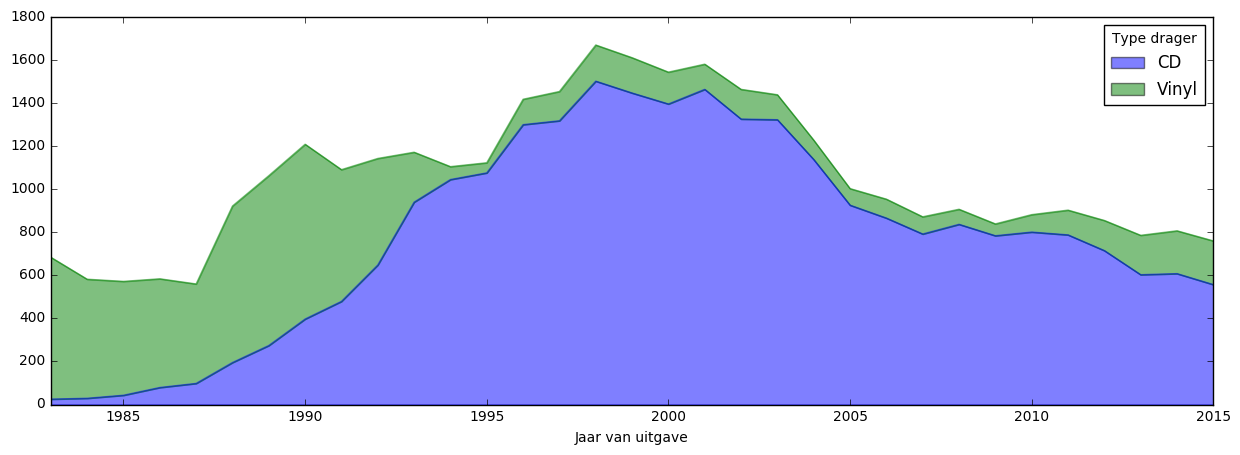

In [4]:
from pandas import crosstab
import matplotlib.pyplot as plt
%matplotlib inline

df_ct = crosstab(df["Jaar van uitgave"], df["Type drager"])
df_ct.plot.area(figsize=(15, 5), alpha=0.5)

## De conclusie

Misschien wel ongevraagd, maar het eerste dat opvalt aan de grafiek hierboven is de enorme terugval in releases (met Vlaamse artiesten) sinds de jaren 2000. We verkeren momenteer ergens tussen het niveau van de jaren 80 en 90. De tienjarige piek van releases met Vlaamse artiesten tussen 1995 en 2005 zit ondertussen al een tijdje in de achteruitkijkspiegel.

Los daarvan zien we inderdaad dat er een flink stuk van de Muziekcentrum, nu Kunstenpunt, collectie op vinyl ligt. En zoals mijn collega correct aangaf is dat aandeel langzaam groeiend. Desalniettemin blijft het overgrote gedeelte van de collectie toch bestaan uit CDs.